# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [24]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ_441B/fraudTest.csv")
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [27]:
df_select.columns
type(df_select["trans_date_trans_time"][0])
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-27-a83afe78f6ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-27-a83afe78f6ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [28]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [47]:
ros = RandomOverSampler(random_state = 0)
over_X, over_y = ros.fit_resample(X_train,y_train) 

In [46]:
rus = RandomUnderSampler(random_state=0)
under_X, under_y = rus.fit_resample(X_train,y_train)

In [45]:
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
over_X_norm = scaler.fit_transform(over_X)
under_X_norm = scaler.fit_transform(under_X)
SMOTE_X_norm = scaler.fit_transform(smote_X)

In [49]:
from sklearn.linear_model import LogisticRegression
over_log =  LogisticRegression().fit(over_X_norm, over_y)
under_log = LogisticRegression().fit(under_X_norm, under_y)
Smote_log = LogisticRegression().fit(SMOTE_X_norm, smote_y)

# 4.) Test the three models

In [57]:
import warnings
warnings.filterwarnings("default", category=FutureWarning)

y_pred_over = over_log.predict(X_test)
y_pred_under = under_log.predict(X_test)
y_pred_smote = Smote_log.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [56]:
print("Oversampled Accuracy: ", over_log.score(X_test, y_test))
print("Undersampled Accuracy: ", under_log.score(X_test, y_test))
print("SMOTE Accuracy: ", Smote_log.score(X_test, y_test))

Oversampled Accuracy:  0.66625878739893
Undersampled Accuracy:  0.6573094364068236
SMOTE Accuracy:  0.6817941889200797


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# 5.) Which performed best in Out of Sample metrics?

The Smote model had the highest Out-of-Sample test metrics, as it had the highest accuracy of all sampling method with 68%. Over and Undersampling respectively had a lower accuracy of 66.6% and 65.7%.

In [ ]:
6

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [58]:
OG_data_temp = pd.concat([X_train, y_train], axis = 1)

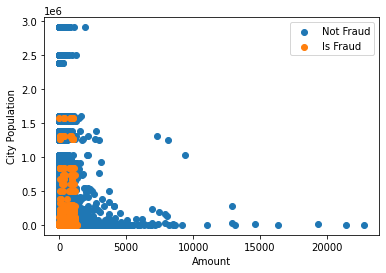

In [59]:
#Before
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==0]['amt'], OG_data_temp[OG_data_temp['is_fraud']==0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==1]['amt'], OG_data_temp[OG_data_temp['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()

In [61]:
Smote_data = pd.concat([smote_X, smote_y], axis = 1)

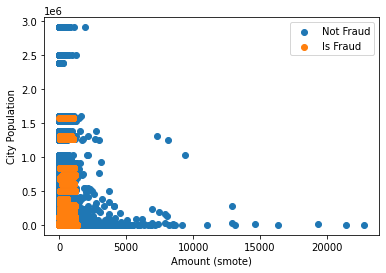

In [62]:
#After

plt.scatter(Smote_data[Smote_data['is_fraud']==0]['amt'], Smote_data[Smote_data['is_fraud']==0]['city_pop'])
plt.scatter(Smote_data[Smote_data['is_fraud']==1]['amt'], Smote_data[Smote_data['is_fraud']==1]['city_pop'])
plt.legend(['Not Fraud', 'Is Fraud'])
plt.xlabel('Amount (smote)')
plt.ylabel('City Population')
plt.show()